### Problem 1 (10 Points)

Sketch graphically the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad f({\bf x})=(x_1+1)^2+(x_2-2)^2\\
{\text{subject to }} & \quad g_1 = x_1-2\leq 0,{\quad} g_3 = -x_1\leq 0,\\
& \quad g_2 = x_2-1\leq 0, {\quad} g_4 = -x_2\leq 0.
\end{aligned}
$$

Find the optimum graphically. Determine directions of feasible descent at the corner points of the feasible domain. Show the gradient directions of $f$ and $g_i$s at these points. Verify graphical results analytically using the KKT conditions.

### Problem 2 (10 Points)

Graph the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=-x_1\\
{\text{subject to }} & \quad g_1=x_2-(1-x_1)^3\leq 0{\quad} {\rm and}{\quad} x_2\geq 0.
\end{aligned}
$$ 

Find the solution graphically. Then apply the optimality conditions. Can you find a solution based on the optimality conditions? Why? (From Kuhn and Tucker, 1951.)

### Problem 3 (30 Points)

Find a local solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2,x_3} & \quad  f=x_1x_2+x_2x_3+x_1x_3\\
{\text{subject to }} & \quad h=x_1+x_2+x_3-3=0.
\end{aligned}
$$ 

Use two methods: reduced gradient and Lagrange multipliers.

### Problem 4 (20 Points)

Use reduced gradient to	find the value(s) of the parameter $b$ for which the point $x_1=1$, $x_2=2$ is the solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2} & \quad  f=2x_{1} + bx_2\\
{\text{subject to }} & \quad g_1 = x_{1}^{2}+ x_{2}^{2}-5\leq 0\\
& \quad g_2= x_1- x_2-2\leq 0.
\end{aligned}
$$ 

### Problem 5 (30 Points)

Find the solution for 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}\\
{\text{subject to }} & \quad h_1 = x_{1}^{2}/4+x_{2}^{2}/5+x_{3}^{2}/25-1=0\\
& \quad h_2 = x_1+x_2-x_3= 0,
\end{aligned}
$$ 

by implementing the generalized reduced gradient algorithm.

Solution 1

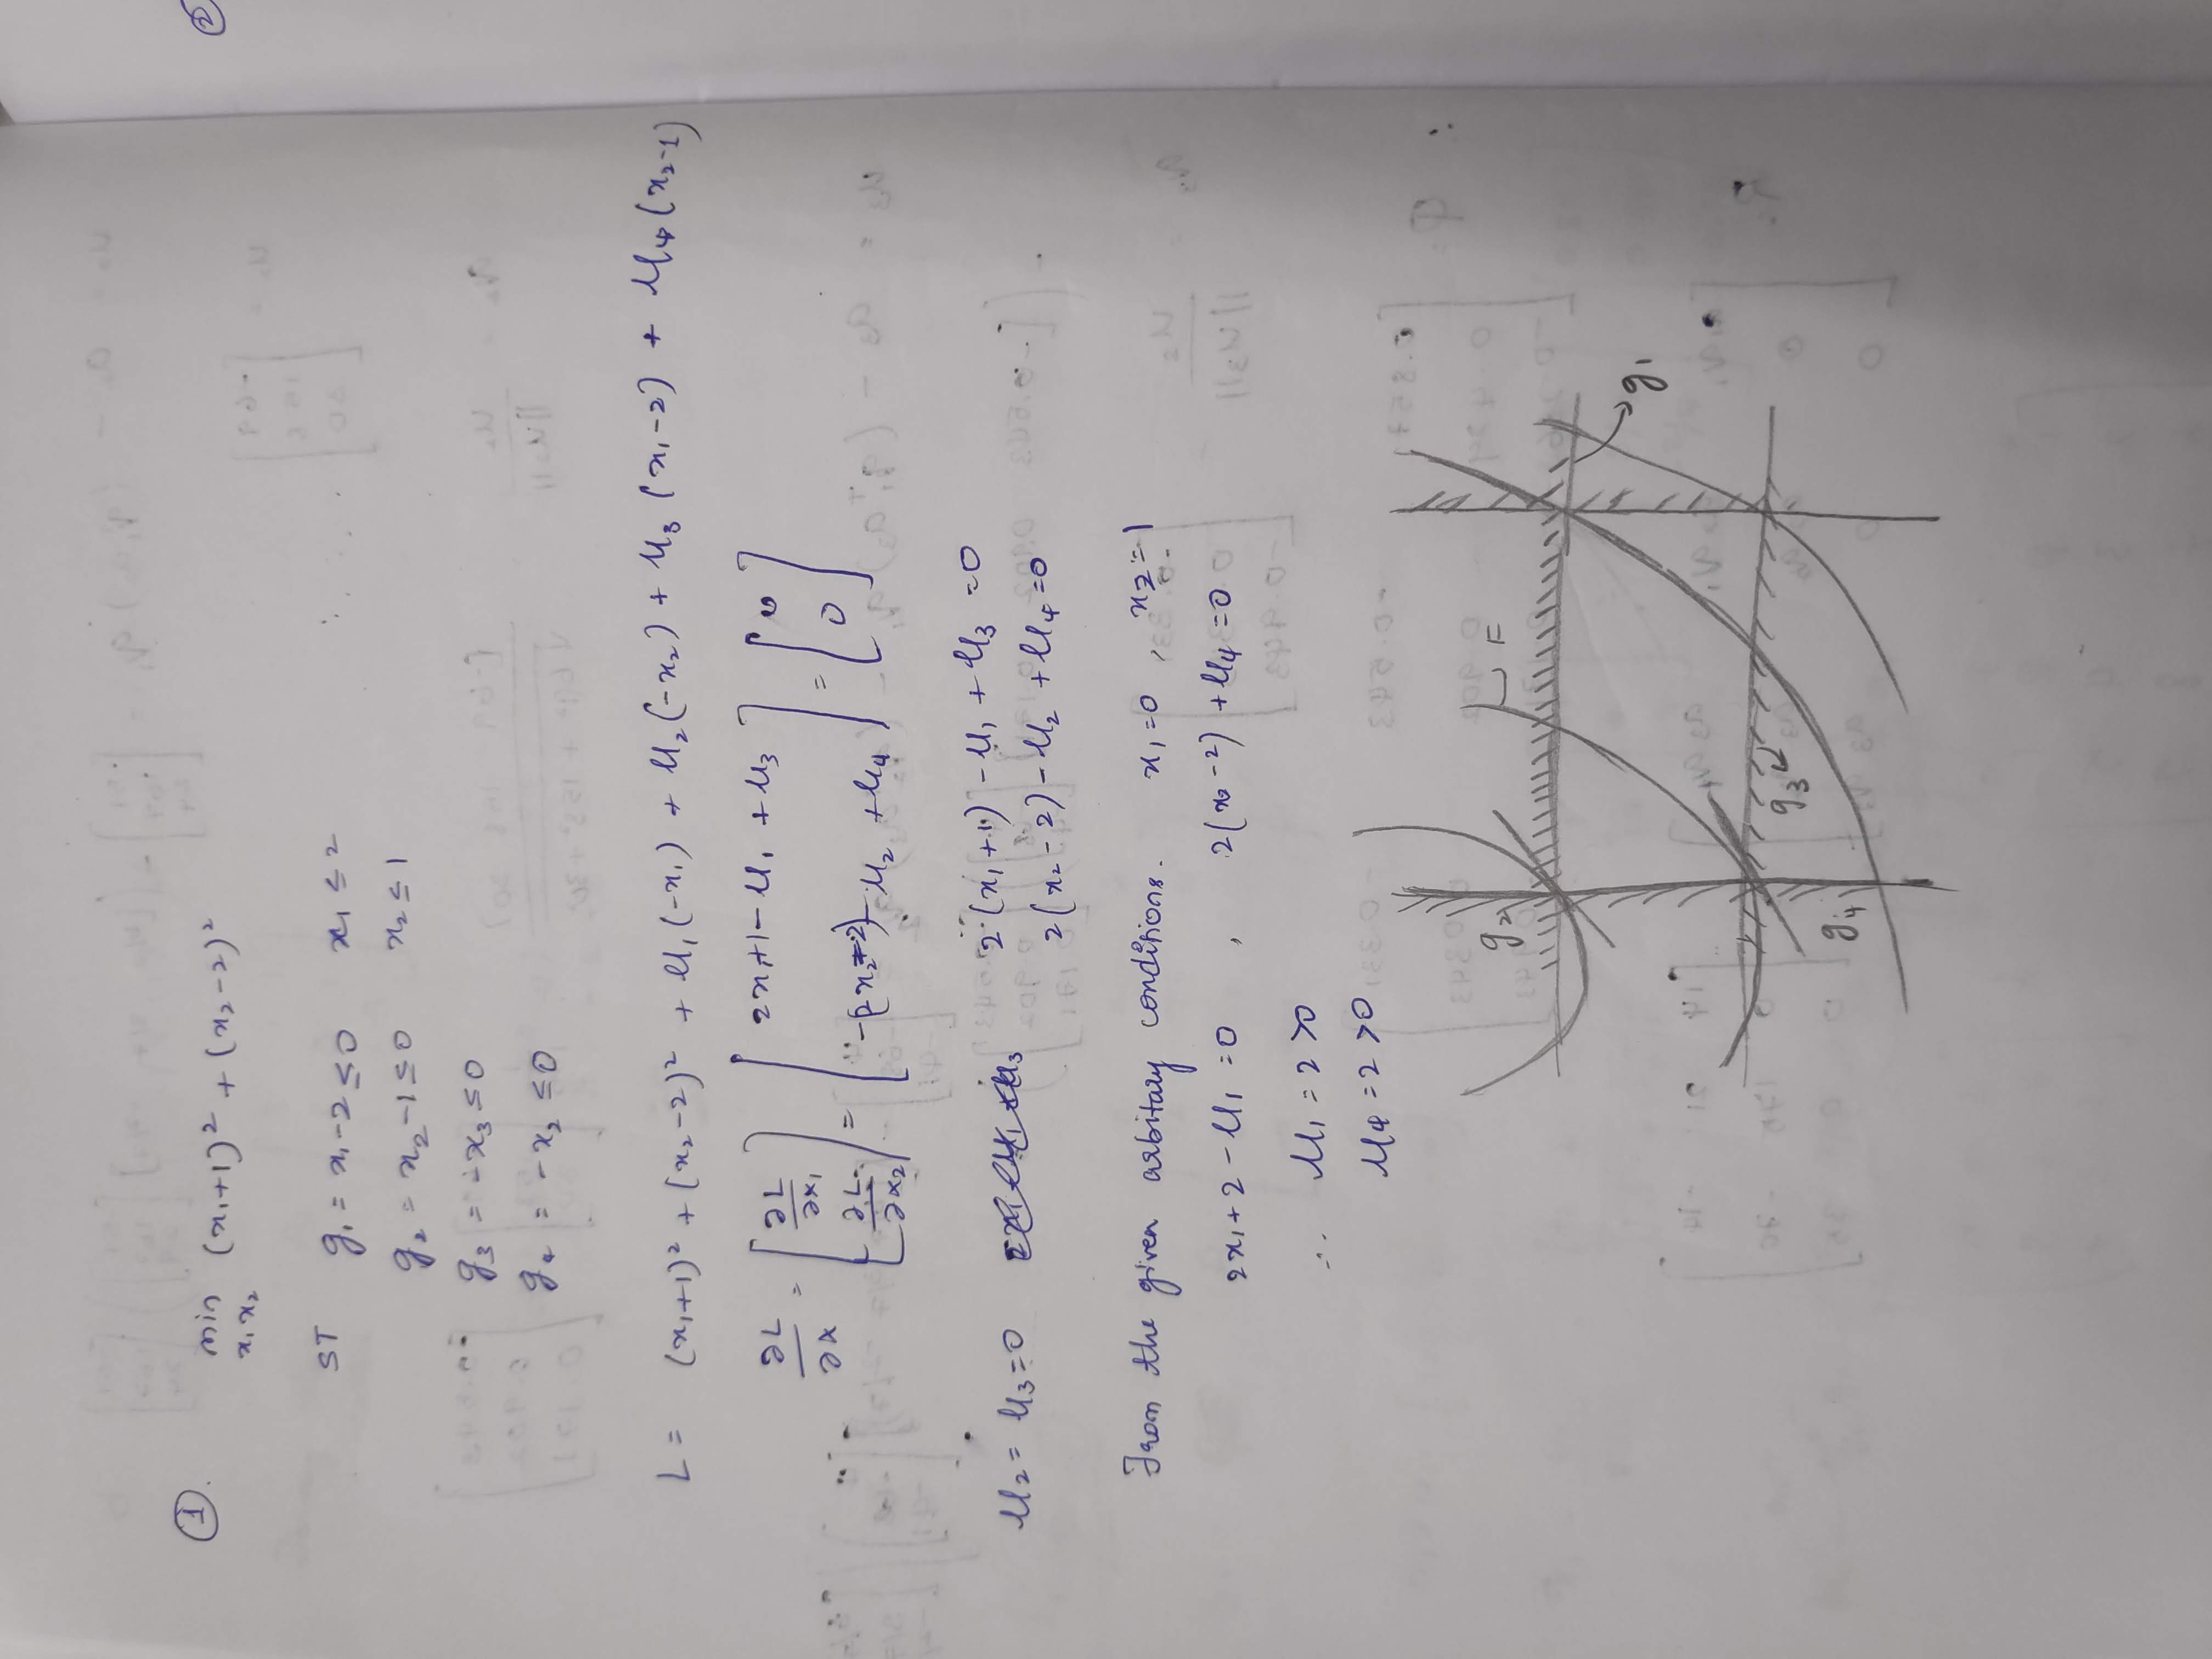

solution2
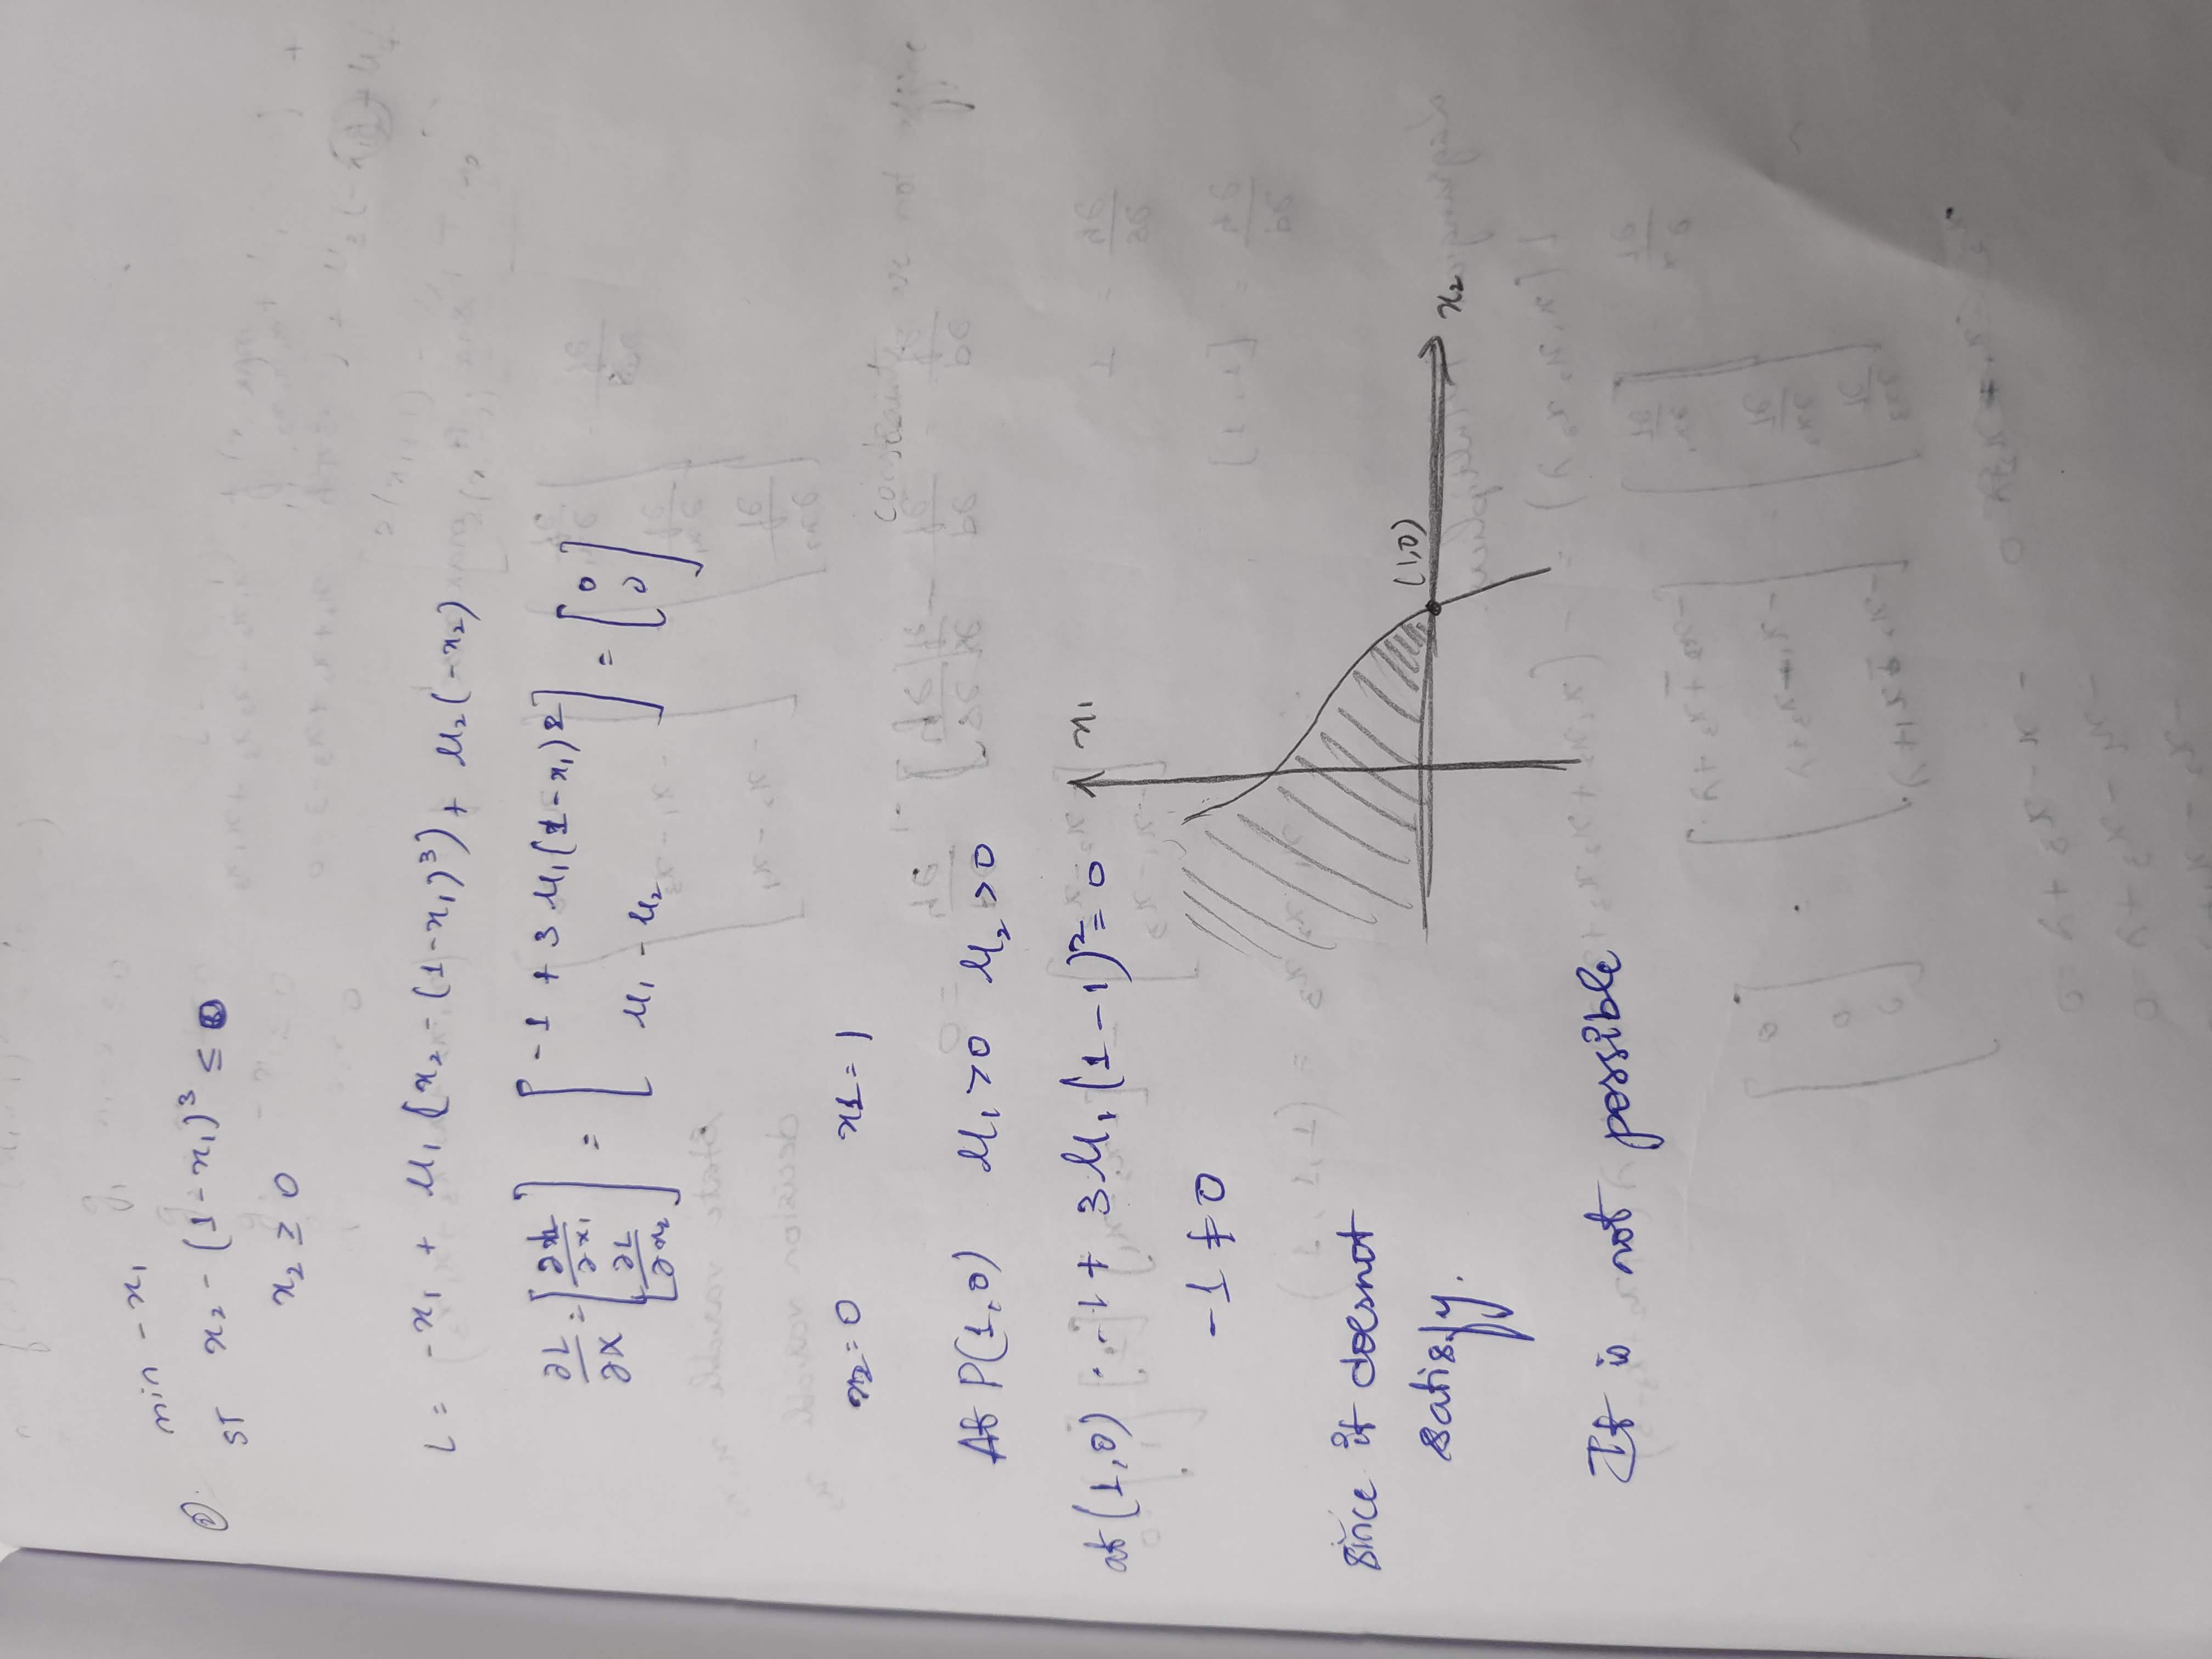


Solution 3
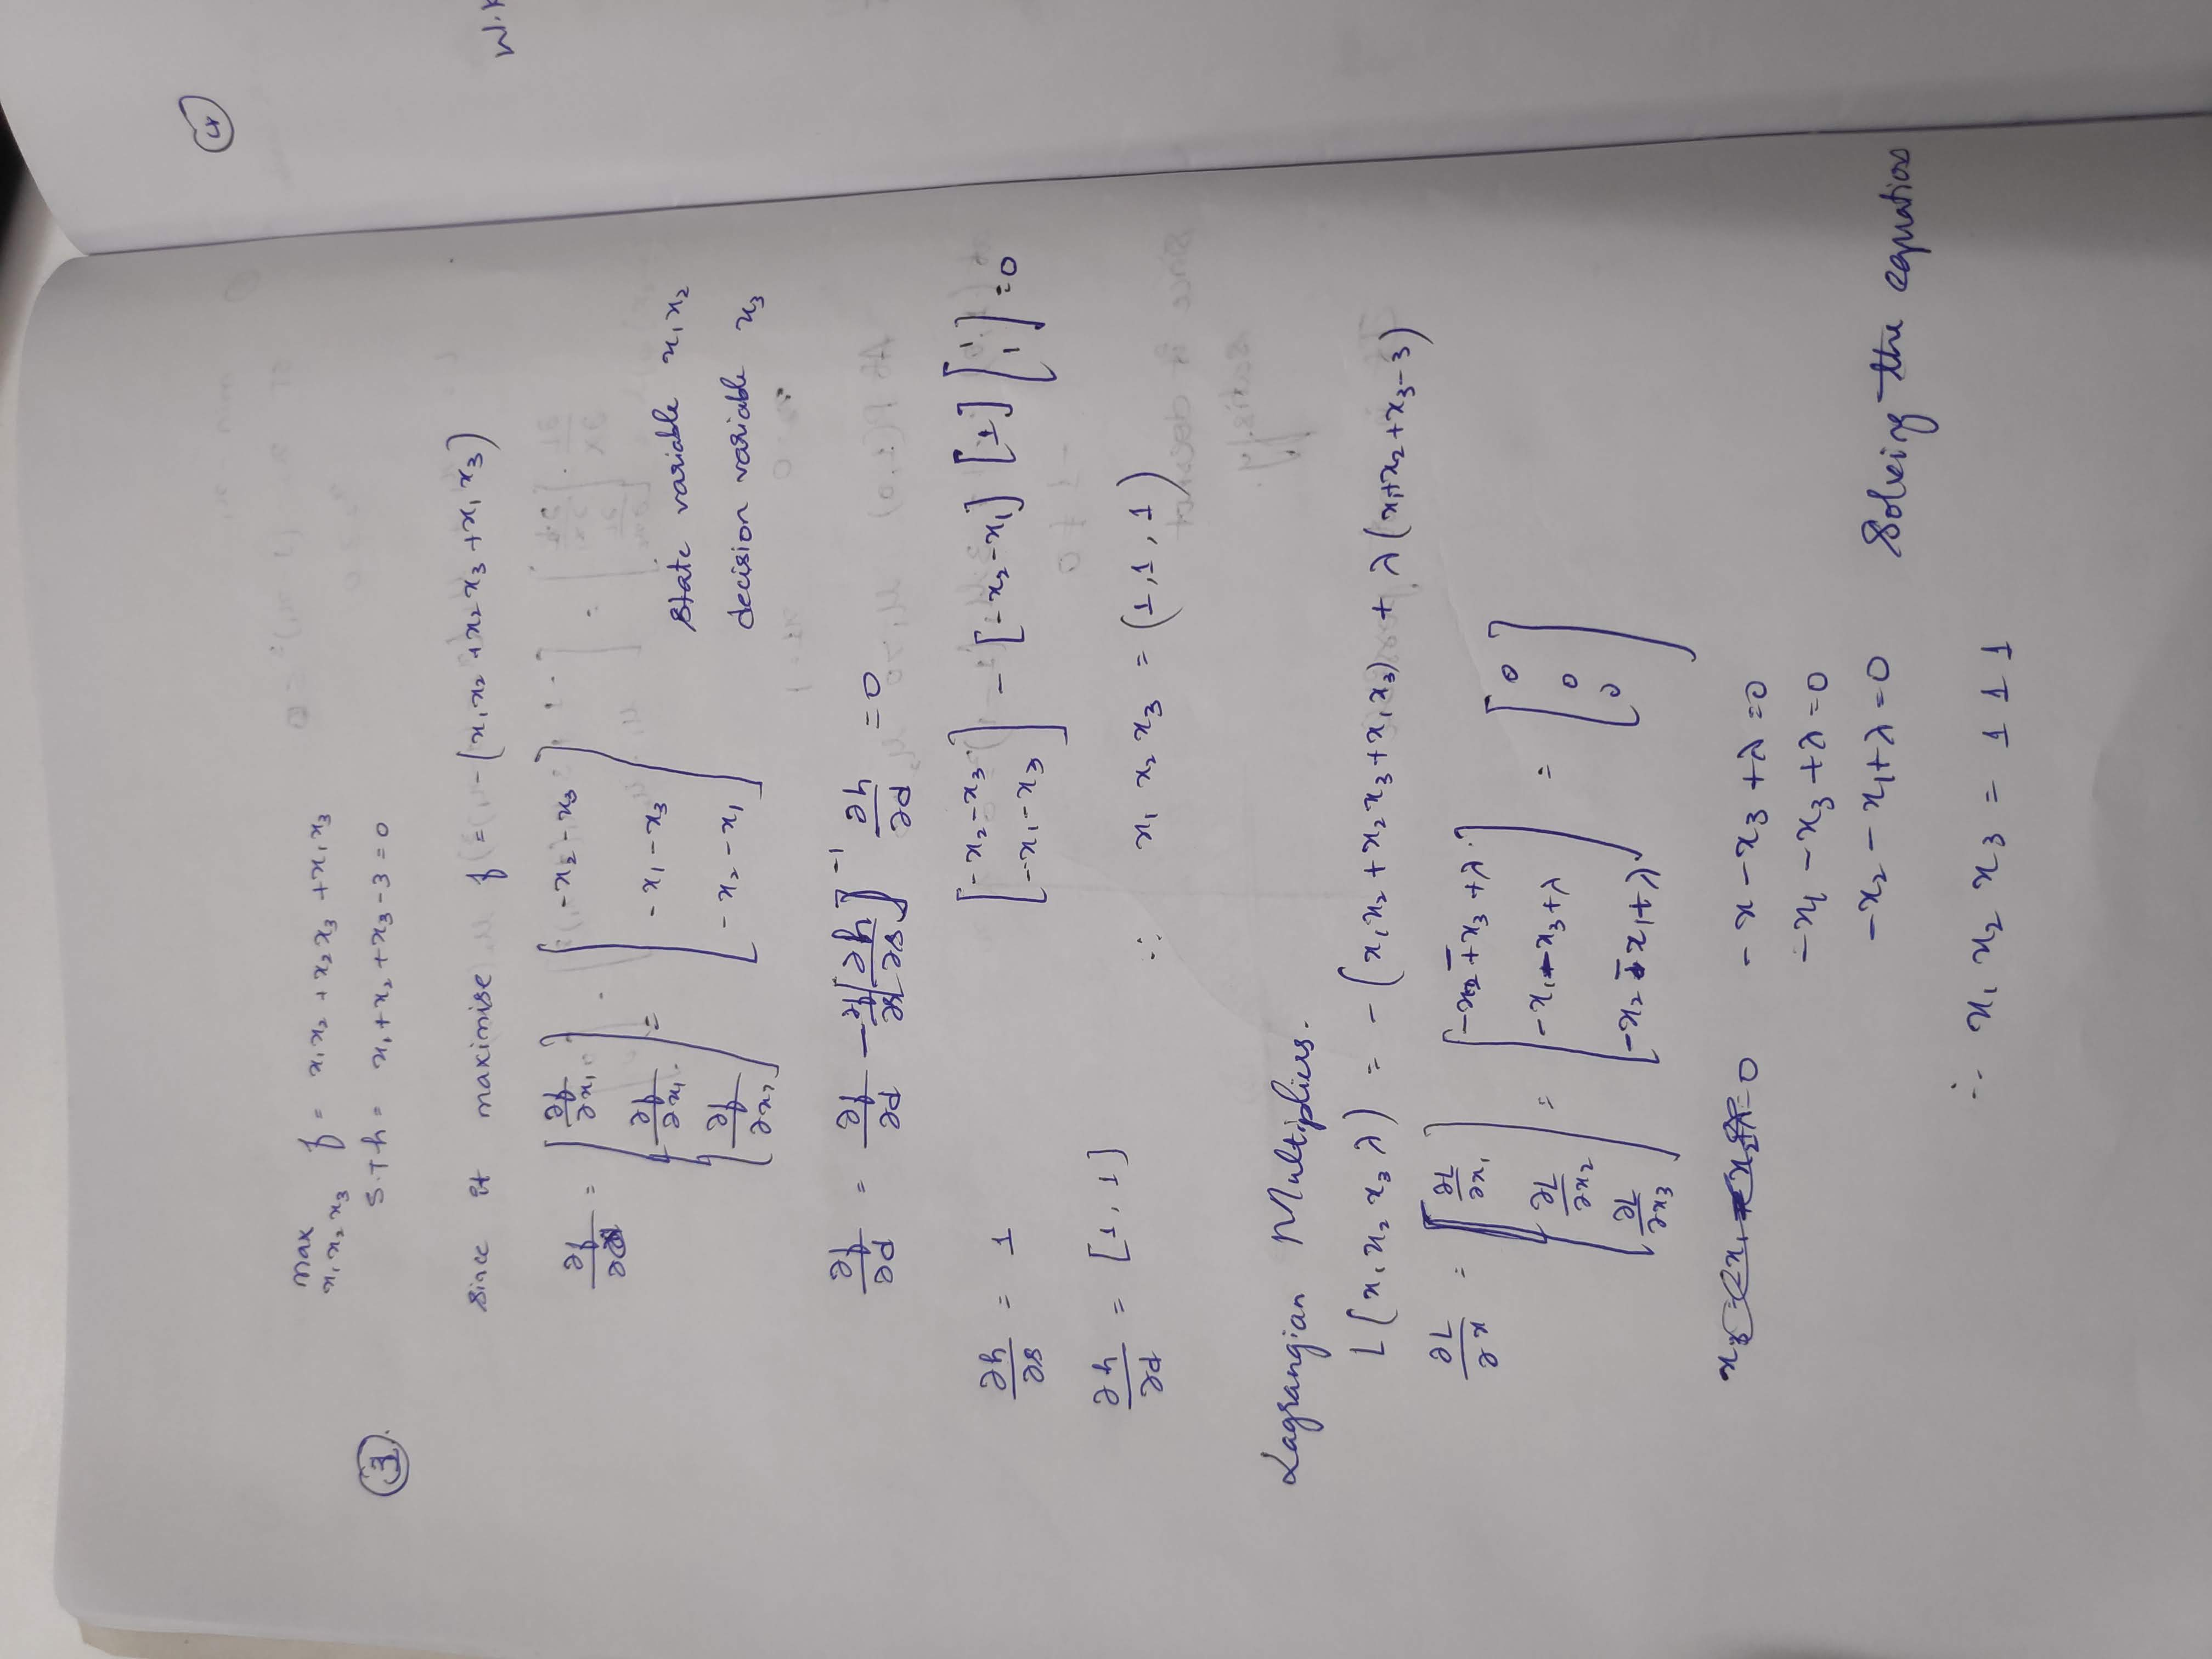

Solution 4
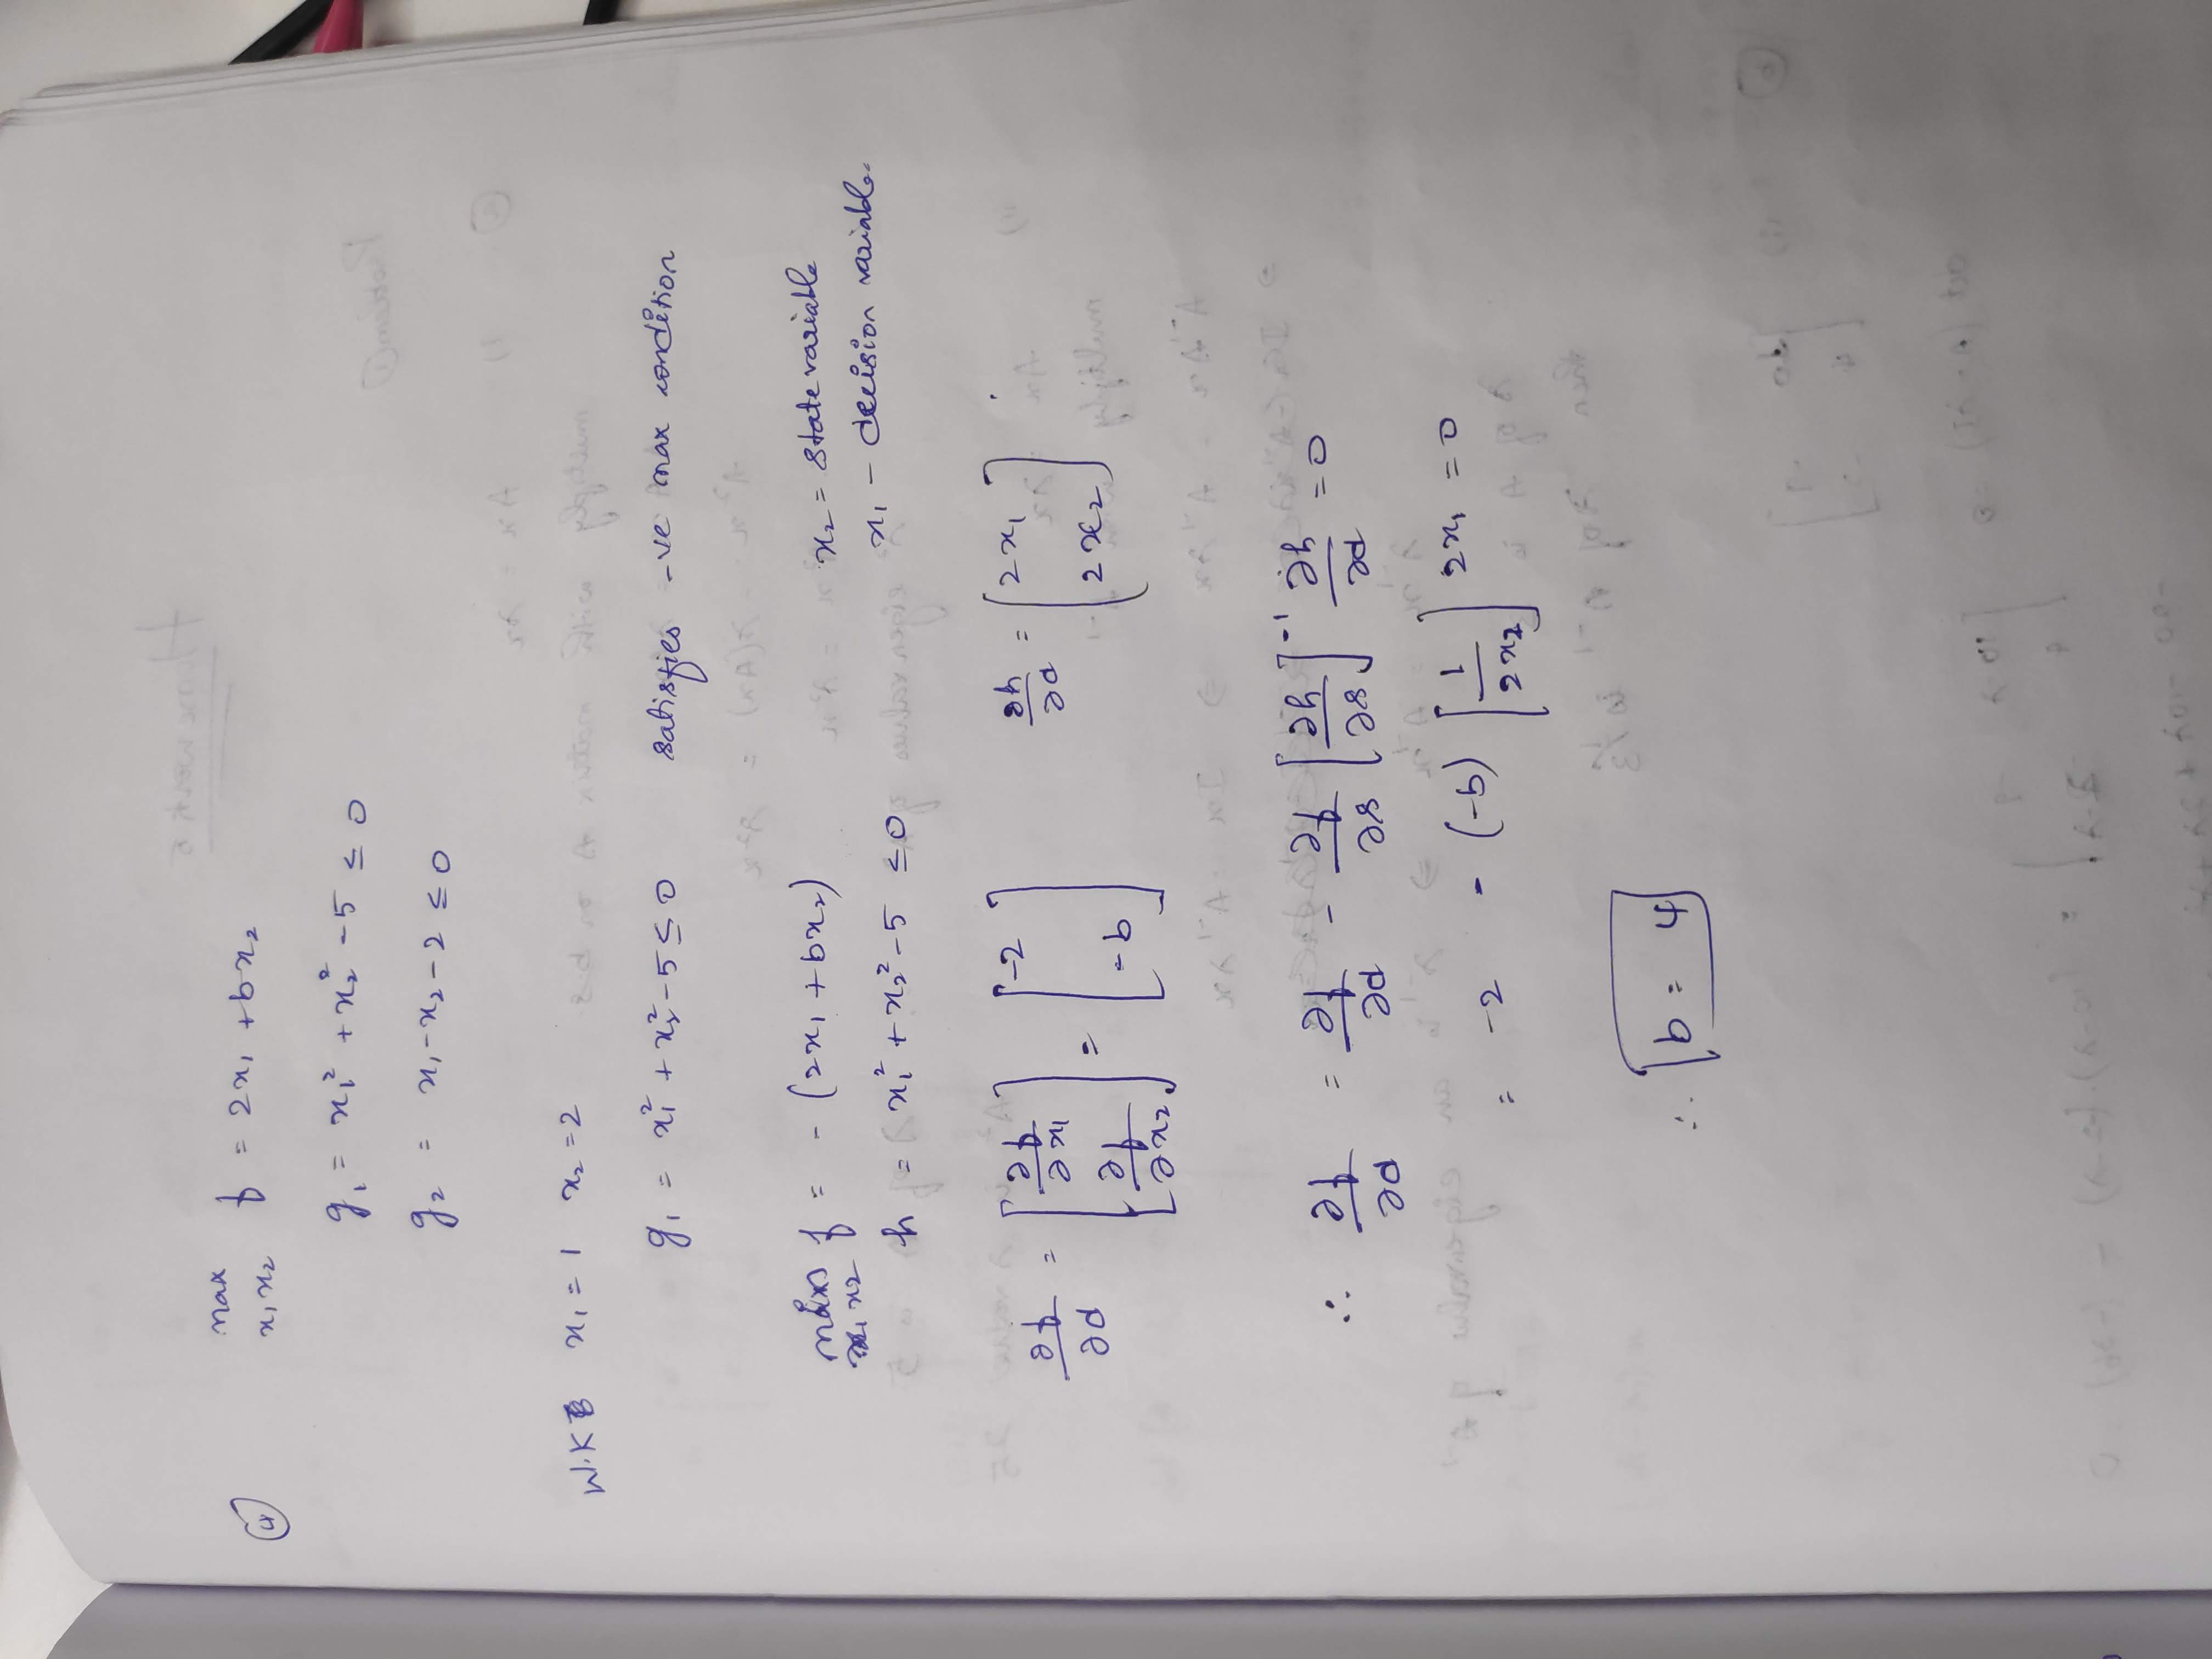

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

def objfun(x):
    return x[0]**2+x[1]**2+x[2]**2

def Df_pd(x):
    return 2*x[0] 

def Df_ps(x):
    return np.array([2*x[1], 2*x[2]])

def Dh_ps(x):
    return np.array([[2/5*x[1], 2/25*x[2]],[1, -1]])

def Dh_pd(x):
    return np.array([[x[0]/2],[1]])

def Df_Dd(x):  
    return Df_pd(x) - np.matmul( np.matmul( Df_ps(x), np.linalg.inv(Df_ps(x))), Dh_pd(x) )

e = 0.001
k = 0


def linesearch(dfdd, x):
    a=1
    b=.5
    t=.3
    def x_alpha(x,a,DfDd): 
    f_alpha = (x[0]-a*DfDd)[0]
    P_alpha = x[1:3] + a* np.transpose( np.matmul(  np.matmul(np.linalg.inv(Dh_ps(x)) , Dh_pd(x) ), np.transpose([Df_Dd(x)]) ) )[0]
    return np.append(f_alpha,p_alpha)
    while objfun(x_alpha(x,a,DfDd)) > (objfun(x) - a*t* DfDd**2):
        a=b*a
    return a
def s(x): 
    while np.linalg.norm(np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ]))  > e: 
        Dh_ps=Dh_ps(x)
        sk= np.transpose( np.transpose([x[1:3]]) - np.matmul( np.linalg.inv(Dh_ps), np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ])   ))  
        x=np.append(x[0:1], np.transpose(sk[0]))
    return x

#by trial and error inital guess [0,2.05,2.05]




